In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
#Load the patient dataset using pandas
patients = pd.read_csv("patients.csv")

patients.head()

,patient_id,age,gender,city
0,1001,56,Female,Lucknow
1,1002,69,Female,Delhi
2,1003,46,Female,Lucknow
3,1004,32,Female,Delhi
4,1005,60,Male,Mumbai


In [3]:
# Load the diagnoses dataset using pandas 

diagnoses = pd.read_csv("diagnoses.csv")

diagnoses.head(2)



,patient_id,disease,severity
0,1023,Diabetes,Severe
1,1024,CKD,Moderate


In [4]:
# Load the lab dataset using pandas 

labs = pd.read_csv("lab_results.csv")

labs.head()

,patient_id,test_name,test_value
0,1049,BP,55.30
1,1017,Creatinine,167.16
2,1044,Creatinine,238.05
3,1028,ALT,165.09
4,1030,Blood Sugar,127.63


In [5]:
df1 = pd.merge(patients,diagnoses,on ='patient_id',how='inner')
df1

df=pd.merge(df1,labs,on='patient_id',how='inner')

df

,patient_id,age,gender,city,disease,severity,test_name,test_value
0,1001,56,Female,Lucknow,NAFLD,Moderate,Creatinine,108.64
1,1001,56,Female,Lucknow,CKD,Mild,Creatinine,108.64
2,1001,56,Female,Lucknow,CKD,Moderate,Creatinine,108.64
3,1002,69,Female,Delhi,CKD,Mild,BP,124.40
4,1002,69,Female,Delhi,CKD,Mild,BP,236.15
...,...,...,...,...,...,...,...,...
184,1047,56,Male,Mumbai,Diabetes,Severe,Blood Sugar,211.37
185,1047,56,Male,Mumbai,Diabetes,Severe,BP,205.43
186,1049,21,Male,Lucknow,Hypertension,Mild,BP,55.30
187,1049,21,Male,Lucknow,Hypertension,Mild,Creatinine,63.87


In [7]:
df.shape

(189, 8)

In [43]:
# Statistics summary

df.describe()

,patient_id,age,test_value,High_Risk
count,189.000000,189.000000,189.000000,189.000000
mean,1028.534392,44.867725,159.165714,0.534392
std,12.461649,13.987778,63.524606,0.500141
min,1001.000000,19.000000,52.170000,0.000000
25%,1022.000000,33.000000,113.800000,0.000000
50%,1032.000000,44.000000,165.090000,1.000000
75%,1039.000000,56.000000,215.290000,1.000000
max,1049.000000,69.000000,248.100000,1.000000


In [45]:
# Missing values 

df.isnull().sum()

patient_id    0
age           0
gender        0
city          0
disease       0
severity      0
test_name     0
test_value    0
High_Risk     0
dtype: int64

In [13]:
df.columns

Index(['patient_id', 'age', 'gender', 'city', 'disease', 'severity',
       'test_name', 'test_value'],
      dtype='object')

In [44]:
# Top 5 diagnoses

df['disease'].value_counts().head()

disease
CKD             56
NAFLD           47
Hypertension    45
Diabetes        41
Name: count, dtype: int64

In [8]:
# City-wise average age

df.groupby('city')['age'].mean()

city
Delhi      40.045455
Jaipur     49.119048
Lucknow    45.520548
Mumbai     56.375000
Name: age, dtype: float64

In [15]:
# Highest avg lab by diagnosis

df.groupby('disease')['test_value'].mean().sort_values(ascending=False)

disease
Diabetes        174.545610
NAFLD           163.660213
CKD             153.299821
Hypertension    147.758444
Name: test_value, dtype: float64

In [16]:
#  Highest avg lab by city

df.groupby('city')['test_value'].mean().sort_values(ascending=False)

city
Delhi      166.705909
Jaipur     157.990238
Lucknow    153.834932
Mumbai     151.773750
Name: test_value, dtype: float64

In [18]:
# Top diagnoses above 50

df[df['age']>50]['disease'].value_counts().head(3)

disease
NAFLD       24
CKD         21
Diabetes    15
Name: count, dtype: int64

In [34]:
#Highest lab value

df['test_value'].max()

248.1

In [21]:
# Avg lab by gender

df.groupby('gender')['test_value'].mean()

gender
Female    161.566087
Male      155.435405
Name: test_value, dtype: float64

In [23]:
# Common diagnosis per city

df.groupby('city')['disease'].agg(lambda x: x.mode()[0])

city
Delhi             NAFLD
Jaipur     Hypertension
Lucknow        Diabetes
Mumbai         Diabetes
Name: disease, dtype: object

In [30]:
# City with highest labs

df['city'].value_counts().idxmax()

'Lucknow'

In [34]:
# Patients above 50 

df[df['age'] > 50]


,patient_id,age,gender,city,disease,severity,test_name,test_value,Lab_Status
0,1001,56,Female,Lucknow,NAFLD,Moderate,Creatinine,108.64,High
1,1001,56,Female,Lucknow,CKD,Mild,Creatinine,108.64,High
2,1001,56,Female,Lucknow,CKD,Moderate,Creatinine,108.64,High
3,1002,69,Female,Delhi,CKD,Mild,BP,124.40,High
4,1002,69,Female,Delhi,CKD,Mild,BP,236.15,High
...,...,...,...,...,...,...,...,...,...
165,1042,54,Male,Lucknow,CKD,Mild,Creatinine,66.82,Normal
166,1043,68,Female,Jaipur,CKD,Mild,ALT,230.51,High
167,1043,68,Female,Jaipur,CKD,Mild,BP,214.37,High
184,1047,56,Male,Mumbai,Diabetes,Severe,Blood Sugar,211.37,High


In [35]:
# Age vs diagnosis

df.groupby('disease')['age'].mean()

disease
CKD             42.928571
Diabetes        46.170732
Hypertension    42.911111
NAFLD           47.914894
Name: age, dtype: float64

In [39]:
# Lab result distribution

df['test_value'].describe()

count    189.000000
mean     159.165714
std       63.524606
min       52.170000
25%      113.800000
50%      165.090000
75%      215.290000
max      248.100000
Name: test_value, dtype: float64

In [11]:
# Rank cities

df['city'].value_counts().rank(ascending=False)

city
Lucknow    1.0
Delhi      2.0
Jaipur     3.0
Mumbai     4.0
Name: count, dtype: float64

In [17]:
# Create a function to classify lab results into Low, Normal, High

def Lab_Status(x):
    if x < 50:
        return "Low"
    elif x <= 100:
        return "Normal"
    else:
        return "High"

df['Lab_Status'] = df['test_value'].apply(Lab_Status)

In [18]:
Lab_Status(40)

'Low'

In [17]:
# Create risk flag column

df['High_Risk'] = df['test_value'].apply(lambda x: 1 if x > avg else 0)

In [19]:
# Above average lab patients

avg = df['test_value'].mean()
df[df['test_value'] > avg]

,patient_id,age,gender,city,disease,severity,test_name,test_value,Lab_Status,High_Risk
4,1002,69,Female,Delhi,CKD,Mild,BP,236.15,High,1
6,1003,46,Female,Lucknow,Diabetes,Mild,Creatinine,212.89,High,1
7,1003,46,Female,Lucknow,Diabetes,Mild,BP,225.49,High,1
8,1003,46,Female,Lucknow,CKD,Mild,Creatinine,212.89,High,1
9,1003,46,Female,Lucknow,CKD,Mild,BP,225.49,High,1
...,...,...,...,...,...,...,...,...,...,...
181,1045,38,Female,Lucknow,CKD,Mild,BP,200.68,High,1
182,1045,38,Female,Lucknow,CKD,Mild,Blood Sugar,176.37,High,1
183,1045,38,Female,Lucknow,CKD,Mild,BP,200.68,High,1
184,1047,56,Male,Mumbai,Diabetes,Severe,Blood Sugar,211.37,High,1


In [21]:
#  High-risk patient list

df[df['High_Risk'] == 1]


,patient_id,age,gender,city,disease,severity,test_name,test_value,High_Risk
4,1002,69,Female,Delhi,CKD,Mild,BP,236.15,1
6,1003,46,Female,Lucknow,Diabetes,Mild,Creatinine,212.89,1
7,1003,46,Female,Lucknow,Diabetes,Mild,BP,225.49,1
8,1003,46,Female,Lucknow,CKD,Mild,Creatinine,212.89,1
9,1003,46,Female,Lucknow,CKD,Mild,BP,225.49,1
...,...,...,...,...,...,...,...,...,...
181,1045,38,Female,Lucknow,CKD,Mild,BP,200.68,1
182,1045,38,Female,Lucknow,CKD,Mild,Blood Sugar,176.37,1
183,1045,38,Female,Lucknow,CKD,Mild,BP,200.68,1
184,1047,56,Male,Mumbai,Diabetes,Severe,Blood Sugar,211.37,1


In [49]:
# Abnormal % by city

(df['High_Risk'].groupby(df['city']).mean()) * 100

city
Delhi      54.545455
Jaipur     61.904762
Lucknow    47.945205
Mumbai     50.000000
Name: High_Risk, dtype: float64

In [30]:
#Correlation by diagnosis

df.groupby('disease')[['age','test_value']].corr()

age  test_value
disease                                      
CKD          age         1.000000   -0.040895
             test_value -0.040895    1.000000
Diabetes     age         1.000000   -0.123751
             test_value -0.123751    1.000000
Hypertension age         1.000000    0.261934
             test_value  0.261934    1.000000
NAFLD        age         1.000000   -0.063715
             test_value -0.063715    1.000000

In [27]:
# Top diagnoses above 50

df[df['age']>50]['disease'].value_counts().head(3)

disease
NAFLD       24
CKD         21
Diabetes    15
Name: count, dtype: int64

In [36]:
#Average lab value per test

df.groupby('test_name')['test_value'].mean()

test_name
ALT            158.170263
BP             168.680000
Blood Sugar    148.449286
Creatinine     159.677705
Name: test_value, dtype: float64

In [38]:
#Lab tests per patient

df.groupby('patient_id')['test_value'].count()

patient_id
1001     3
1002     3
1003     4
1004     1
1005     1
1006     6
1007     1
1008     2
1009     2
1013     6
1014     2
1015     8
1020     1
1022     8
1023     8
1024     9
1025     3
1026     4
1027     4
1028     8
1029     3
1030     4
1032    20
1033     8
1035    12
1036     1
1037     8
1039    10
1040     3
1041     1
1042    12
1043     2
1044    12
1045     4
1047     2
1049     3
Name: test_value, dtype: int64

In [39]:
# Most common diagnosis

df['disease'].value_counts().idxmax()

'CKD'

In [40]:
#  Disease with highest severe cases

df[df['severity']=='Severe']['disease'].value_counts()

disease
Diabetes        18
Hypertension    17
NAFLD           16
CKD             16
Name: count, dtype: int64

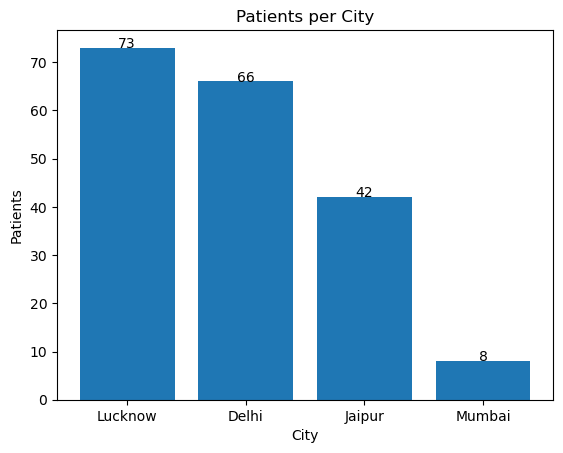

In [46]:
# MATPLOTLIB PRACTICE
#Custom city bar chart

counts = df['city'].value_counts()

plt.bar(counts.index, counts.values)
plt.xlabel("City")
plt.ylabel("Patients")
plt.title("Patients per City")

for i,v in enumerate(counts.values):
    plt.text(i, v, str(v), ha='center')

plt.show()

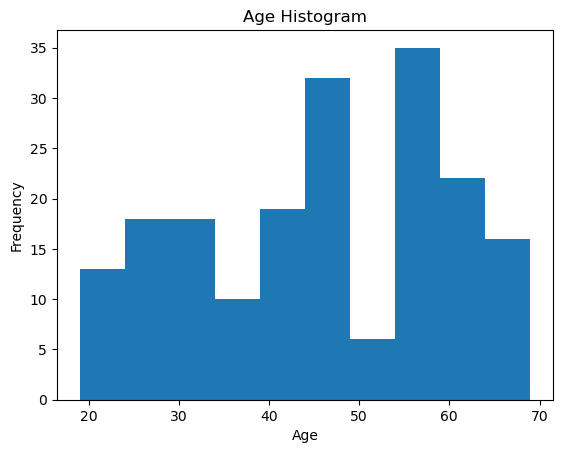

In [48]:
# Styled histogram

plt.hist(df['age'], bins=10)
plt.grid(False)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Histogram")
plt.show()

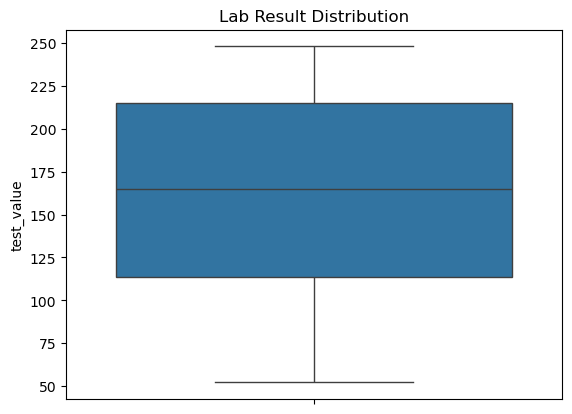

In [54]:
#Check spread and outliers in lab results.

sns.boxplot(y='test_value', data=df)
plt.title("Lab Result Distribution")
plt.show()

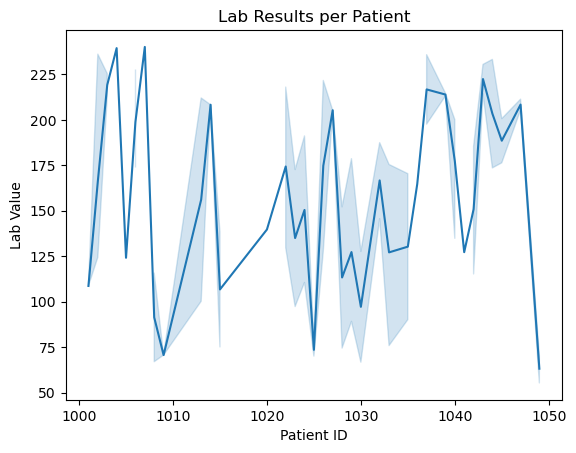

In [56]:
# Line Plot of Lab Results per Patient

#Observe lab result trends across patients.

sns.lineplot(x='patient_id', y='test_value', data=df)
plt.title("Lab Results per Patient")
plt.xlabel("Patient ID")
plt.ylabel("Lab Value")
plt.show()

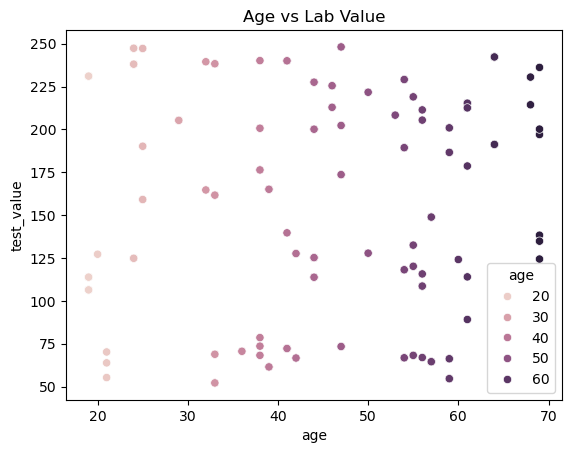

In [59]:
#Analyze relationship between age and lab results.

sns.scatterplot(x='age', y='test_value',hue='age', data=df)
plt.title("Age vs Lab Value")
plt.show()

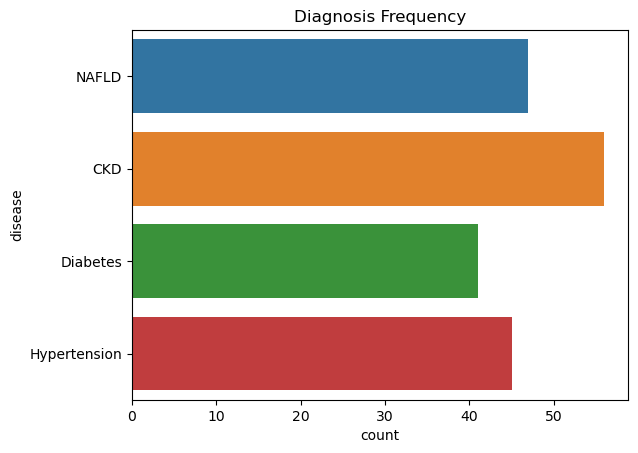

In [64]:
#Find most common diseases among patients.

sns.countplot(y='disease',hue='disease', data=df)
plt.title("Diagnosis Frequency")
plt.show()

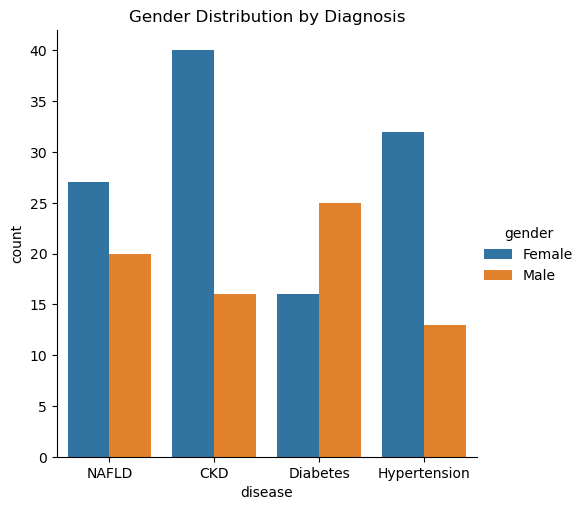

In [66]:
#Compare number of male and female patients across different diagnoses.

sns.catplot(x="disease", hue="gender", data=df, kind="count", height=5)
plt.title("Gender Distribution by Diagnosis")
plt.show()

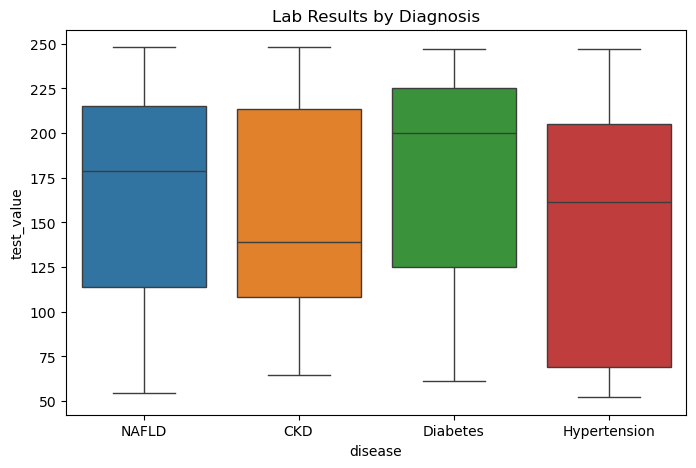

In [69]:
# Compare lab result spread for each diagnosis.

plt.figure(figsize=(8,5))
sns.boxplot(x="disease", y="test_value",hue='disease', data=df)
plt.title("Lab Results by Diagnosis")
plt.show()

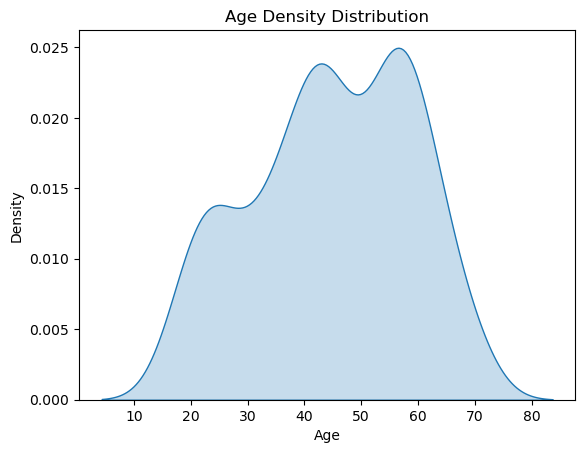

In [72]:
# Understand smooth distribution of patient ages.

sns.kdeplot(df['age'], fill=True)
plt.title("Age Density Distribution")
plt.xlabel("Age")
plt.show()

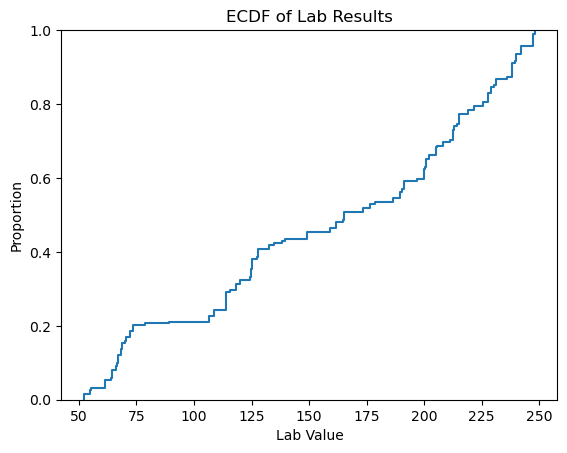

In [73]:
# Analyze cumulative distribution of lab results.

sns.ecdfplot(df['test_value'])
plt.title("ECDF of Lab Results")
plt.xlabel("Lab Value")
plt.ylabel("Proportion")
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_5896\785808834.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='Set2')
C:\Users\asus\AppData\Local\Temp\ipykernel_5896\785808834.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='disease', data=df, palette='viridis')


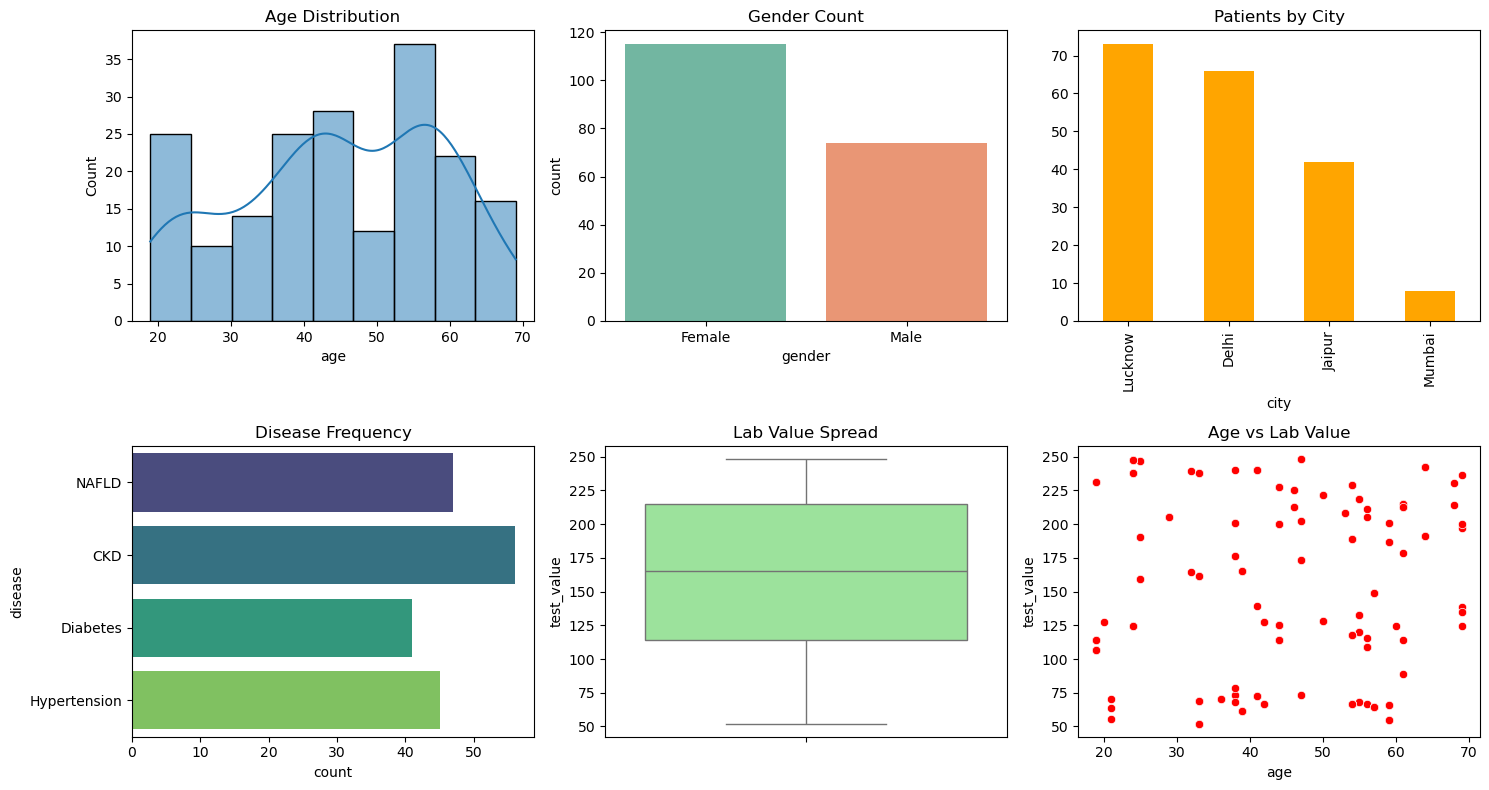

In [11]:

plt.figure(figsize=(15,8))

# 1. Age Histogram
plt.subplot(2,3,1)
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")

# 2. Gender Count
plt.subplot(2,3,2)
sns.countplot(x='gender', data=df, palette='Set2')
plt.title("Gender Count")

# 3. City-wise Patients
plt.subplot(2,3,3)
df['city'].value_counts().plot(kind='bar', color='orange')
plt.title("Patients by City")

# 4. Disease Frequency
plt.subplot(2,3,4)
sns.countplot(y='disease', data=df, palette='viridis')
plt.title("Disease Frequency")

# 5. Lab Value Boxplot
plt.subplot(2,3,5)
sns.boxplot(y='test_value', data=df, color='lightgreen')
plt.title("Lab Value Spread")

# 6. Age vs Lab Scatter
plt.subplot(2,3,6)
sns.scatterplot(x='age', y='test_value', data=df, color='red')
plt.title("Age vs Lab Value")

plt.tight_layout()
plt.show()

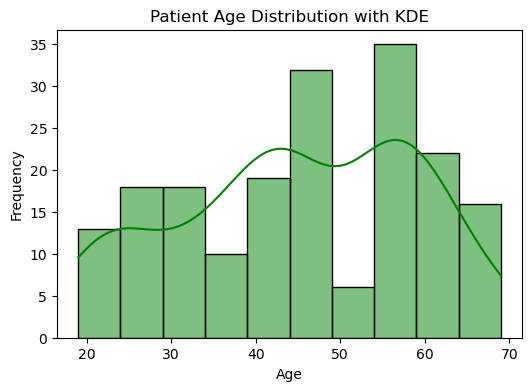

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(df['age'], kde=True, bins=10,color='green')

plt.title("Patient Age Distribution with KDE")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

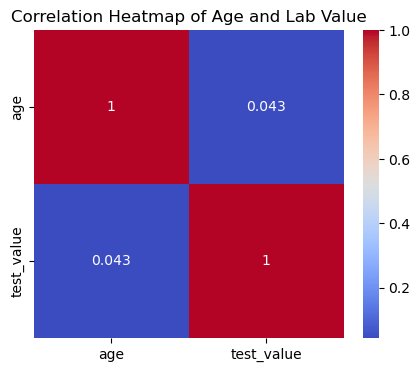

In [14]:

# Select numerical columns
corr = df[['age', 'test_value']].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title("Correlation Heatmap of Age and Lab Value")
plt.show()